In [1]:
import os
import re
import pickle

import numpy as np
import matplotlib.pyplot as plt

from coffea import hist

from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
#from exp_limits import exp_limits_mu

from HNLAnalysis import HNLAnalysis

In [21]:
# Read in reults from coffea run
#tag = 'bck_WZ_ZZ_TT_tighter_sel_electron'
tag = '220428_all_back'

with open(f'result_{tag}.pkl', 'rb') as f:
    result = pickle.load(f)
with open (f'counter_{tag}.pkl', 'rb') as f:
    event_counter = pickle.load(f)

#print(result)    
#print(event_counter)

FileNotFoundError: [Errno 2] No such file or directory: 'result_220428_all_back.pkl'

In [12]:
# Lumi and cross sections for plotting

# # Lumi and cross sections for plotting
# xsecs = { # pb
#     #HNL
#     # 'HNL100':1.,
#     # 'HNL500':1.,
#     # 'HNL1000':1.,
#     # 'HNL100_sing':1.,
#     # 'HNL500_sing':1.,
#     # 'HNL1000_sing':1.,
#     # 'HNL100_2highest':1.,
#     # 'HNL500_2highest':1.,
#     # 'HNL1000_2highest':1.,
#     # 'HNL100_+missingpT':1.,
#     # 'HNL500_+missingpT':1.,
#     # 'HNL1000_+missingpT':1.,
#     #Drell-Yann
#     'DYJets_To_LL_M_50_madgraphMLM': 5398.0,
#     'DYJets_To_LL_M_50_amcatnloFXFX: ': 6404.0,
#     'DYJets_To_LL_M_50_amcatnloFXFX:': 6404.0,
#     'DYJets_To_LL_M_50_amcatnloFXFX ': 6404.0,
#     'DYJets_To_LL_M_50_amcatnloFXFX': 6404.0,

#     'DY1Jets_To_LL_M_50' : 928.3,
#     'DY2Jets_To_LL_M_50' : 293.6,
#     'DY3Jets_To_LL_M_50' : 86.53,
#     'DY4Jets_To_LL_M_50' : 41.28,
#     'DYJets_To_LL_M_10to50 ' : 15890.0,
#     #Electroweak
#     'EWK_WMinus2Jets_W_To_LNu_M_50 ':32.05,
#     'EWK_WPlus2Jets_W_To_LNu_M_50  ':39.05,
#     'EWK_Z2Jets_Z_To_LL_M_50 ':6.215,
#     #TTbar
#     'TT_To_2L2Nu ':687.1,
#     'TT_To_SemiLeptonic ':687.1,
#     'TT_To_Hadronic ':687.1,
#     # #SingleTop
#     'ST_tW_antitop_5f_inclusiveDecays ':34.97,
#     'ST_tW_top_5f_inclusiveDecays ':34.91,
#     'ST_t_channel_antitop_4f_InclusiveDecays ':69.09,
#     'ST_t_channel_top_4f_InclusiveDecays ':115.3,
#     # W+jets
#     'WJets_To_LNu ':53870.0,
#     'WJ1ets_To_LNu ':8927.0,
#     'W2Jets_To_LNu ':2809.0,
#     'W3Jets_To_LNu ':826.3,
#     'W4Jets_To_LNu ':544.3,
#     #DiBoson
#     'ZZ ':12.17,
#     'ZZ_To_4L ':1.325,
#     'ZZ_To_2L2Nu ':0.9738,
#     'WW ':75.95,
#     'WW_To_2L2Nu ':11.09,
#     'WZ ':27.59,
#     'WZ_To_3LNu ':5.213,
#     #TT+bosons
#     'TTWJets_To_LNu ':0.2161,
#     'TTZ_To_LLNuNu_M_10 ':0.2439,
#     'TTWW  ':0.007003,
#     'TTZZ ':0.001386,
#     'TTWZ ':0.002453,
#     # #DATA
#     # 'Data':1.,
    
    
    
    
    
#     ###OLD ONES
#     #'WZ':5.213,
#     #'ZZ_To_4L':1.325,
#     #'ZZ':12.14,
#     #'ZZ_old':1.325, #ZZ to 4L old one
#     # https://twiki.cern.ch/twiki/bin/viewauth/CMS/StandardModelCrossSectionsat13TeV
#     # better to use this one : https://cms-gen-dev.cern.ch/xsdb/?columns=67108863&currentPage=0&pageSize=10&searchQuery=DAS%3DZZ_TuneCP5_13TeV-pythia8
#     #'DY':6077.22,
#     #'DY50':6077.22,
#     #'DY10to50':6077.22,
#     #'WZ_old':5.213,
#     #'tt2l2nu':87.315,
#     #'TTZ':87.315,
#     #'W':20508.9*3.,
#     #'TTWJets':20508.9*3.,

# }

# lumi = 60000. # pb-1
# plot_scale = {
#         #HNL
#     # 'HNL100':1.,
#     # 'HNL500':1.,
#     # 'HNL1000':1.,
#     # 'HNL100_sing':1.,
#     # 'HNL500_sing':1.,
#     # 'HNL1000_sing':1.,
#     # 'HNL100_2highest':1.,
#     # 'HNL500_2highest':1.,
#     # 'HNL1000_2highest':1.,
#     # 'HNL100_+missingpT':1.,
#     # 'HNL500_+missingpT':1.,
#     # 'HNL1000_+missingpT':1.,
#     #Drell-Yann
#     'DYJets_To_LL_M_50_madgraphMLM': 1.,
#     'DYJets_To_LL_M_50_amcatnloFXFX: ': 1.0,
#     'DYJets_To_LL_M_50_amcatnloFXFX:': 1.0,
#     'DYJets_To_LL_M_50_amcatnloFXFX ': 1.0,
#     'DYJets_To_LL_M_50_amcatnloFXFX': 1.0,
#     'DY1Jets_To_LL_M_50' : 1.,
#     'DY2Jets_To_LL_M_50' : 1.,
#     'DY3Jets_To_LL_M_50' : 1.,
#     'DY4Jets_To_LL_M_50' : 1.,
#     'DYJets_To_LL_M_10to50 ' : 1.,
#     #Electroweak
#     'EWK_WMinus2Jets_W_To_LNu_M_50 ':1.,
#     'EWK_WPlus2Jets_W_To_LNu_M_50  ':1.,
#     'EWK_Z2Jets_Z_To_LL_M_50 ':1.,
#     #TTbar
#     'TT_To_2L2Nu ':1.,
#     'TT_To_SemiLeptonic ':1.,
#     'TT_To_Hadronic ':1.,
#     #SingleTop
#     'ST_tW_antitop_5f_inclusiveDecays ':1.,
#     'ST_tW_top_5f_inclusiveDecays ':1.,
#     'ST_t_channel_antitop_4f_InclusiveDecays ':1.,
#     'ST_t_channel_top_4f_InclusiveDecays ':1.,
#     # W+jets
#     'WJets_To_LNu ':1.,
#     'WJ1ets_To_LNu ':1.,
#     'W2Jets_To_LNu ':1.,
#     'W3Jets_To_LNu ':1.,
#     'W4Jets_To_LNu ':1.,
#     #DiBoson
#     'ZZ ':1.,
#     'ZZ_To_4L ':1.,
#     'ZZ_To_2L2Nu ':1.,
#     'WW ':1.,
#     'WW_To_2L2Nu ':1.,
#     'WZ ':1.,
#     'WZ_To_3LNu ':1.,
#     #TT+bosons
#     'TTWJets_To_LNu ':1.,
#     'TTZ_To_LLNuNu_M_10 ':1.,
#     'TTWW  ':1.,
#     'TTZZ ':1.,
#     'TTWZ ':1.,
#     # #DATA
#     # 'Data':1.,


#     #     'WZ':1.,
#     # 'WZ_old':1.,

    
    
# }




# Lumi and cross sections for plotting
xsecs = { # pb
    #HNL
    # 'HNL100':1.,
    # 'HNL500':1.,
    # 'HNL1000':1.,
    # 'HNL100_sing':1.,
    # 'HNL500_sing':1.,
    # 'HNL1000_sing':1.,
    # 'HNL100_2highest':1.,
    # 'HNL500_2highest':1.,
    # 'HNL1000_2highest':1.,
    # 'HNL100_+missingpT':1.,
    # 'HNL500_+missingpT':1.,
    # 'HNL1000_+missingpT':1.,
    #Drell-Yann
    'DYJets_To_LL_M_50_madgraphMLM': 5398.0,
    'DYJets_To_LL_M_50_amcatnloFXFX:': 6404.0,
    'DY1Jets_To_LL_M_50' : 928.3,
    'DY2Jets_To_LL_M_50' : 293.6,
    'DY3Jets_To_LL_M_50' : 86.53,
    'DY4Jets_To_LL_M_50' : 41.28,
    'DYJets_To_LL_M_10to50' : 15890.0,
    #Electroweak
    'EWK_WMinus2Jets_W_To_LNu_M_50':32.05,
    'EWK_WPlus2Jets_W_To_LNu_M_50':39.05,
    'EWK_Z2Jets_Z_To_LL_M_50':6.215,
    #TTbar
    'TT_To_2L2Nu':687.1,
    'TT_To_SemiLeptonic':687.1,
    'TT_To_Hadronic':687.1,
    # #SingleTop
    'ST_tW_antitop_5f_inclusiveDecays':34.97,
    'ST_tW_top_5f_inclusiveDecays':34.91,
    'ST_t_channel_antitop_4f_InclusiveDecays':69.09,
    'ST_t_channel_top_4f_InclusiveDecays':115.3,
    # W+jets
    'WJets_To_LNu':53870.0,
    'WJ1ets_To_LNu':8927.0,
    'W2Jets_To_LNu':2809.0,
    'W3Jets_To_LNu':826.3,
    'W4Jets_To_LNu':544.3,
    #DiBoson
    'ZZ':12.17,
    'ZZ_To_4L':1.325,
    'ZZ_To_2L2Nu':0.9738,
    'WW':75.95,
    'WW_To_2L2Nu':11.09,
    'WZ':27.59,
    'WZ_To_3LNu':5.213,
    #TT+bosons
    'TTWJets_To_LNu':0.2161,
    'TTZ_To_LLNuNu_M_10':0.2439,
    'TTWW':0.007003,
    'TTZZ':0.001386,
    'TTWZ':0.002453,
    # #DATA
    # 'Data':1.,
    
    'ZZ_old':1.325,
    
    
    
    ###OLD ONES
    #'WZ':5.213,
    #'ZZ_To_4L':1.325,
    #'ZZ':12.14,
    #'ZZ_old':1.325, #ZZ to 4L old one
    # https://twiki.cern.ch/twiki/bin/viewauth/CMS/StandardModelCrossSectionsat13TeV
    # better to use this one : https://cms-gen-dev.cern.ch/xsdb/?columns=67108863&currentPage=0&pageSize=10&searchQuery=DAS%3DZZ_TuneCP5_13TeV-pythia8
    #'DY':6077.22,
    #'DY50':6077.22,
    #'DY10to50':6077.22,
    #'WZ_old':5.213,
    #'tt2l2nu':87.315,
    #'TTZ':87.315,
    #'W':20508.9*3.,
    #'TTWJets':20508.9*3.,

}

lumi = 60000. # pb-1
plot_scale = {
        #HNL
    # 'HNL100':1.,
    # 'HNL500':1.,
    # 'HNL1000':1.,
    # 'HNL100_sing':1.,
    # 'HNL500_sing':1.,
    # 'HNL1000_sing':1.,
    # 'HNL100_2highest':1.,
    # 'HNL500_2highest':1.,
    # 'HNL1000_2highest':1.,
    # 'HNL100_+missingpT':1.,
    # 'HNL500_+missingpT':1.,
    # 'HNL1000_+missingpT':1.,
    #Drell-Yann
    'DYJets_To_LL_M_50_madgraphMLM': 1.,
    'DYJets_To_LL_M_50_amcatnloFXFX:': 1.,
    'DY1Jets_To_LL_M_50' : 1.,
    'DY2Jets_To_LL_M_50' : 1.,
    'DY3Jets_To_LL_M_50' : 1.,
    'DY4Jets_To_LL_M_50' : 1.,
    'DYJets_To_LL_M_10to50' : 1.,
    #Electroweak
    'EWK_WMinus2Jets_W_To_LNu_M_50':1.,
    'EWK_WPlus2Jets_W_To_LNu_M_50':1.,
    'EWK_Z2Jets_Z_To_LL_M_50':1.,
    #TTbar
    'TT_To_2L2Nu':1.,
    'TT_To_SemiLeptonic':1.,
    'TT_To_Hadronic':1.,
    #SingleTop
    'ST_tW_antitop_5f_inclusiveDecays':1.,
    'ST_tW_top_5f_inclusiveDecays':1.,
    'ST_t_channel_antitop_4f_InclusiveDecays':1.,
    'ST_t_channel_top_4f_InclusiveDecays':1.,
    # W+jets
    'WJets_To_LNu':1.,
    'WJ1ets_To_LNu':1.,
    'W2Jets_To_LNu':1.,
    'W3Jets_To_LNu':1.,
    'W4Jets_To_LNu':1.,
    #DiBoson
    'ZZ':1.,
    'ZZ_To_4L':1.,
    'ZZ_To_2L2Nu':1.,
    'WW':1.,
    'WW_To_2L2Nu':1.,
    'WZ':1.,
    'WZ_To_3LNu':1.,
    #TT+bosons
    'TTWJets_To_LNu':1.,
    'TTZ_To_LLNuNu_M_10':1.,
    'TTWW':1.,
    'TTZZ':1.,
    'TTWZ':1.,
    # #DATA
    # 'Data':1.,

    'ZZ_old':1.,
    #     'WZ':1.,
    # 'WZ_old':1.,

    
    
}


event_counter['sumw']['Data'] = lumi

# A bit hacky treatment of same-sign, more elegant way well possible...
for k, v in list(xsecs.items()):
    if not 'HNL' in k:
        xsecs[k+'SS'] = v
for k, v in list(plot_scale.items()):
    if not 'HNL' in k and not k+'SS' in plot_scale:
        plot_scale[k+'SS'] = v
for k, v in list(xsecs.items()):
    if 'Data' in k:
        event_counter['sumw'][k] = lumi
    elif k.endswith('SS'):
        event_counter['sumw'][k] = event_counter['sumw'][k[:-2]]
        

In [13]:
print(f'| {"Backgrounds":<43}', end='')
print(f'| {"cross-section   ":<15}', end='')
print(f'| {"sumw            |":<15}', end='\n')

print(u'\u2500' * 81)
for name, cs in list(xsecs.items()):
    if("SS" not in name and "amcat" not in name):
        print(f'| {name:<43}', end='')
        print(f'| {cs:<15} ', end='')
        temp = str(int(event_counter['sumw'][name]))
        print(f'| {temp:<15} |', end='\n')

        print(u'\u2500' * 81)
    


| Backgrounds                                | cross-section   | sumw            |
─────────────────────────────────────────────────────────────────────────────────
| DYJets_To_LL_M_50_madgraphMLM              | 5398.0          | 0               |
─────────────────────────────────────────────────────────────────────────────────
| DY1Jets_To_LL_M_50                         | 928.3           | 0               |
─────────────────────────────────────────────────────────────────────────────────
| DY2Jets_To_LL_M_50                         | 293.6           | 0               |
─────────────────────────────────────────────────────────────────────────────────
| DY3Jets_To_LL_M_50                         | 86.53           | 0               |
─────────────────────────────────────────────────────────────────────────────────
| DY4Jets_To_LL_M_50                         | 41.28           | 0               |
─────────────────────────────────────────────────────────────────────────────────
| DYJets_T

In [14]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false
}

<IPython.core.display.Javascript object>

In [15]:
print(event_counter['sumw'])
print("--------------------------------")
print([(s, lumi*xsecs[s]) for s in xsecs.keys()])

defaultdict_accumulator(<class 'float'>, {'ZZ_To_4L': 130483169.6672, 'ZZ_old': 101343342.8448, 'Data': 60000.0, 'DYJets_To_LL_M_50_madgraphMLM': 0.0, 'DYJets_To_LL_M_50_madgraphMLMSS': 0.0, 'DYJets_To_LL_M_50_amcatnloFXFX:': 0.0, 'DYJets_To_LL_M_50_amcatnloFXFX:SS': 0.0, 'DY1Jets_To_LL_M_50': 0.0, 'DY1Jets_To_LL_M_50SS': 0.0, 'DY2Jets_To_LL_M_50': 0.0, 'DY2Jets_To_LL_M_50SS': 0.0, 'DY3Jets_To_LL_M_50': 0.0, 'DY3Jets_To_LL_M_50SS': 0.0, 'DY4Jets_To_LL_M_50': 0.0, 'DY4Jets_To_LL_M_50SS': 0.0, 'DYJets_To_LL_M_10to50': 0.0, 'DYJets_To_LL_M_10to50SS': 0.0, 'EWK_WMinus2Jets_W_To_LNu_M_50': 0.0, 'EWK_WMinus2Jets_W_To_LNu_M_50SS': 0.0, 'EWK_WPlus2Jets_W_To_LNu_M_50': 0.0, 'EWK_WPlus2Jets_W_To_LNu_M_50SS': 0.0, 'EWK_Z2Jets_Z_To_LL_M_50': 0.0, 'EWK_Z2Jets_Z_To_LL_M_50SS': 0.0, 'TT_To_2L2Nu': 0.0, 'TT_To_2L2NuSS': 0.0, 'TT_To_SemiLeptonic': 0.0, 'TT_To_SemiLeptonicSS': 0.0, 'TT_To_Hadronic': 0.0, 'TT_To_HadronicSS': 0.0, 'ST_tW_antitop_5f_inclusiveDecays': 0.0, 'ST_tW_antitop_5f_inclusiveDecaysS

In [16]:
#print(result)
#max([max(a) for a in result['pt_mu_1'].values().values()])

In [17]:
selections = HNLAnalysis.get_selections_test()
print(selections)

['all', '3leptons', 'jet_veto', 'bjet_veto', 'emutau']


In [18]:
selections = HNLAnalysis.get_selections_test()

tex_samples = 'c'*len(result[f'sumw_all'])
texout = '''\\begin{table}
\\begin{tabular}{l|'''+f'{tex_samples}'+'''}
                    '''

print(' '*20, end='')
for key in result[f'sumw_all']:
    print(f'| {key:<11}', end='')
    texout += f'& {key:<11}'
print()

texout += '\\\\ \\hline \n'

for stage in selections:
    if stage in ['dsapair', 'patdsa_patdsa', 'patpat_patpat']:
        print('-'*110)
        texout += '\\hline'
    print(f'{stage:<20}', end='')
    texout += '\n'
    stage_tex = stage # cut_to_tex[stage]
    texout += f'{stage_tex:<20}'
    tex_samples += f'\\\\ \\n {stage:<20} '
    try:
        for s, v in result[f'sumw_{stage}'].items():
            xsec = xsecs[s] if s in xsecs else 1.

            if event_counter['sumw'][s]:
                v *= lumi*xsec/event_counter['sumw'][s]
            if stage == 'all':
                v = lumi*xsec
            print(f'| {v:>10.1f} ', end='')
            texout += f'& {v:>10.1f} '
    except KeyError:
        print('Analysing old file? Failing at selection', stage)
    texout += '\\\\'
    print()
texout += '''
\\end{tabular}
\\end{table}
'''
#print(texout)

                    | ZZ_old     | ZZ_To_4L   
all                 |    79500.0 |    79500.0 
3leptons            |     1789.5 |      950.4 
jet_veto            |     1704.1 |      897.2 
bjet_veto           |     1630.0 |      844.0 
emutau              |       49.6 |       47.5 


In [19]:
for v in HNLAnalysis.get_var_axis_pairs():
        #print(v)


IndentationError: expected an indented block (3593638468.py, line 2)

DYJets_To_LL_M_50_madgraphMLM
0.0
DYJets_To_LL_M_50_amcatnloFXFX:
0.0
DY1Jets_To_LL_M_50
0.0
DY2Jets_To_LL_M_50
0.0
DY3Jets_To_LL_M_50
0.0
DY4Jets_To_LL_M_50
0.0
DYJets_To_LL_M_10to50
0.0
EWK_WMinus2Jets_W_To_LNu_M_50
0.0
EWK_WPlus2Jets_W_To_LNu_M_50
0.0
EWK_Z2Jets_Z_To_LL_M_50
0.0
TT_To_2L2Nu
0.0
TT_To_SemiLeptonic
0.0
TT_To_Hadronic
0.0
ST_tW_antitop_5f_inclusiveDecays
0.0
ST_tW_top_5f_inclusiveDecays
0.0
ST_t_channel_antitop_4f_InclusiveDecays
0.0
ST_t_channel_top_4f_InclusiveDecays
0.0
WJets_To_LNu
0.0
WJ1ets_To_LNu
0.0
W2Jets_To_LNu
0.0
W3Jets_To_LNu
0.0
W4Jets_To_LNu
0.0
ZZ
0.0
ZZ_To_4L
130483169.6672
ZZ_To_2L2Nu
0.0
WW
0.0
WW_To_2L2Nu
0.0
WZ
0.0
WZ_To_3LNu
0.0
TTWJets_To_LNu
0.0
TTZ_To_LLNuNu_M_10
0.0
TTWW
0.0
TTZZ
0.0
TTWZ
0.0
ZZ_old
101343342.8448
DYJets_To_LL_M_50_madgraphMLMSS
0.0
DYJets_To_LL_M_50_amcatnloFXFX:SS
0.0
DY1Jets_To_LL_M_50SS
0.0
DY2Jets_To_LL_M_50SS
0.0
DY3Jets_To_LL_M_50SS
0.0
DY4Jets_To_LL_M_50SS
0.0
DYJets_To_LL_M_10to50SS
0.0
EWK_WMinus2Jets_W_To_LNu_M_50SS

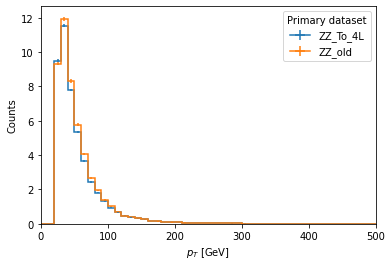

   
Showing eta_e_1_emutau


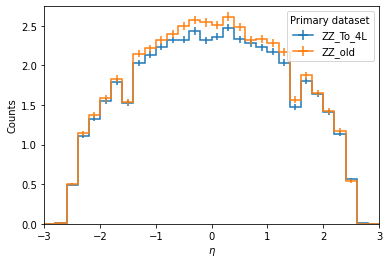

   
Showing phi_e_1_emutau


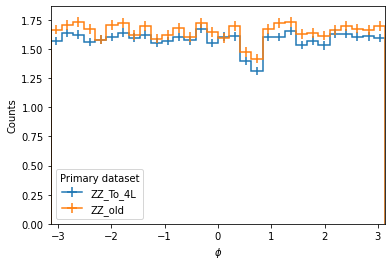

   
Showing charge_e_1_emutau


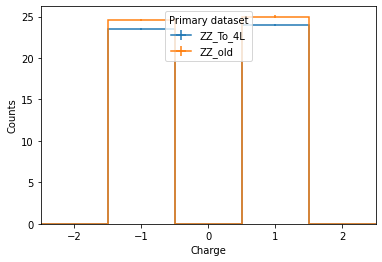

   
Showing pt_e_2_emutau


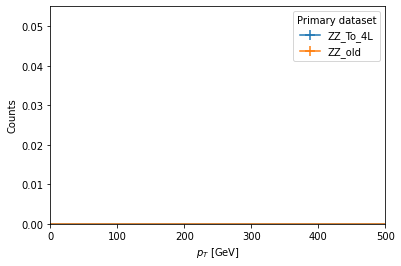

   
Showing eta_e_2_emutau


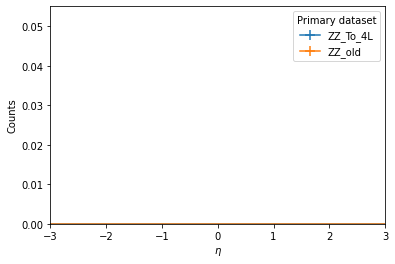

   
Showing phi_e_2_emutau


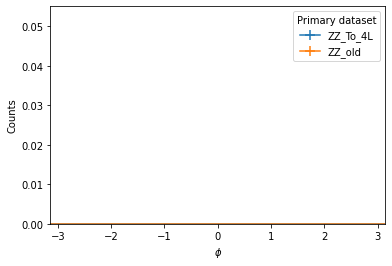

   
Showing charge_e_2_emutau


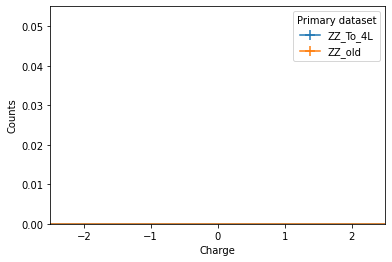

   
Showing m_e_tau_emutau
Showing m_mu_tau_emutau
Showing m_e_mu_emutau
Showing dr_e_tau_emutau
Showing dr_mu_tau_emutau
Showing dr_e_mu_emutau
Showing m_lll_emutau
Showing pt_jet_1_emutau
Showing pt_jet_2_emutau
Showing m_HNL_emutau
Showing m_HNL_2_emutau
Showing missing_pt1_emutau
Showing missing_pt2_emutau
Showing missing_pt3_emutau
Showing pt_tau_1_etautau
Showing eta_tau_1_etautau
Showing phi_tau_1_etautau
Showing charge_tau_1_etautau
Showing pt_tau_2_etautau
Showing eta_tau_2_etautau
Showing phi_tau_2_etautau
Showing charge_tau_2_etautau
Showing pt_mu_1_etautau
Showing eta_mu_1_etautau
Showing phi_mu_1_etautau
Showing charge_mu_1_etautau
Showing pt_mu_2_etautau
Showing eta_mu_2_etautau
Showing phi_mu_2_etautau
Showing charge_mu_2_etautau
Showing pt_e_1_etautau
Showing eta_e_1_etautau
Showing phi_e_1_etautau
Showing charge_e_1_etautau
Showing pt_e_2_etautau
Showing eta_e_2_etautau
Showing phi_e_2_etautau
Showing charge_e_2_etautau
Showing m_e_tau_etautau
Showing m_mu_tau_etautau


In [20]:

import re
import matplotlib as mpl
%matplotlib inline
from cycler import cycler
import warnings

not_hnl_data = re.compile('(?!HNL)(?!Data)^((?!SS).)*$')
hnl = re.compile('(HNL)')
# data = re.compile('(Data)((?!InvIso).)*$')
data = re.compile('^Data$|^DataSS$|^DataInvTimeSameBX$|^DataSSInvTimeSameBX$')

cols_bkg = ['#fde6f7', '#fafbc3', '#c4fbd6', '#b3e5f4']
cols_sig = ['black', '#386cb0','#f0027f','#bf5b17','#666666', '#7fc97f','#beaed4','#fdc086','#ffff99']
# cols_sig = ['red', 'green', 'blue','purple']
#mpl.rcParams['axes.prop_cycle'] = cycler(color='brg')
for s in xsecs.keys():
    print(s)
    print(event_counter['sumw'][s])


for v in HNLAnalysis.get_var_axis_pairs():
    try:
        var = v[0]
        print('Showing', var)
        scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] if event_counter['sumw'][s] else 1. for s in xsecs.keys()}
        back_scales = {s:1./v for s, v in scales.items()}
        result[var].scale(scales, axis='ds')
#         ax = hist.plot1d(result[var][not_hnl_data], stack=True, fill_opts={
#             'alpha': 1.0, 
#             'linewidths': 0.5,
#             'edgecolor': (0,0,0,0.5)
#             }
#         )
        
        if not len(result[var].values()):
            #print(v[0], 'empty')
            continue
#         max_y = max([max(a) for a in result[var].values().values()])
#         ax.set_ylim(top=1.2*max_y)

        #plt.gca().set_prop_cycle(color=cols_sig)
#         hist.plot1d(result[var][hnl], clear=False)
        warnings.filterwarnings("ignore")
        ax = hist.plot1d(result[var], clear=True)
#         plt.gca().set_prop_cycle(color=cols_sig)
#         hist.plot1d(result[var][data], clear=False, error_opts={
# #         ax = hist.plot1d(result[var][data], clear=True, error_opts={
#     #     'linestyle': 'none',
#         'marker': '.',
#         'markersize': 10.,
#     #     'color': 'k',
#         'elinewidth': 1,
#     })
#         max_y = max([max(a) for a in result[var][data].values().values()])
#         ax.set_ylim(top=1.2*max_y)

        name_plot = tag +"_"+ var
        #plt.savefig(name_plot)
        plt.show()

        print('   ')
        result[var].scale(back_scales, axis='ds') #Alternatively make a deepcopy for each round of plotting?
        warnings.filterwarnings("default")
    except AssertionError:
        pass



In [12]:
len(result['pt_tau_1'].values())


0

In [27]:
print(' '*18, end='')
for key in result[f'sumw_all']:
    print(f'| {key:<10}', end='')
print()
for stage in selections:
    print(f'{stage:<18}', end='')
    for label, v in result[f'sumw_{stage}'].items():
#         v = v/result[f'sumw_hnl_twomuon_acc'][label]
        try:
            #v = v/result[f'sumw_isomu24'][label]
            v = v /result[f'sumw_all'][label]
        except ZeroDivisionError:
            pass
        print(f'| {v:>8.3f}  ', end='')
    print()

                  | ZZ_old    | ZZ        
all               |    1.000  |    1.000  
3leptons          |    0.578  |    0.403  
jet_veto          |    0.550  |    0.380  
bjet_veto         |    0.526  |    0.358  
emutau            |    0.016  |    0.020  


In [35]:
print(' '*18, end='')
for key in result[f'sumw_all']:
    print(f'| {key:<14}', end='')
print()
for stage in selections:
    print(f'{stage:<18}', end='')
    for label, v in result[f'sumw_{stage}'].items():
        print(f'| {v:>12.3f}  ', end='')
    print()

                  | ZZ_old        | ZZ            
all               |  3948496.688  |  3872757.953  
3leptons          |  2281237.102  |  1559893.098  
jet_veto          |  2172335.477  |  1472521.031  
bjet_veto         |  2077815.008  |  1385314.883  
emutau            |    63205.941  |    77918.973  





STACKED HISTOS





In [3]:
#use the .py
